In [27]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.basketball-reference.com/players/j/jamesle01/gamelog/2024"


In [28]:
html = urlopen(url)
soup = BeautifulSoup(html, features="lxml")


In [49]:
table = soup.find("table", {"id": "pgl_basic"})
df = pd.read_html(str(table))[0]

df = df.drop(['Rk', 'G', 'Age', 'Unnamed: 5', 'Unnamed: 7', 'GS'], axis=1)


,Date,Tm,Opp,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2023-10-24,LAL,DEN,29:00,10,16,.625,1,4,.250,...,7,8,5,1,0,0,1,21,20.3,+7
1,2023-10-26,LAL,PHO,35:00,7,14,.500,1,5,.200,...,7,8,9,2,2,5,1,21,20.3,+22
2,2023-10-29,LAL,SAC,39:05,11,19,.579,3,8,.375,...,15,15,8,0,0,8,2,27,17.8,-5
3,2023-10-30,LAL,ORL,32:47,7,17,.412,2,6,.333,...,3,3,4,3,1,5,0,19,11.9,+5
4,2023-11-01,LAL,LAC,42:29,13,19,.684,4,8,.500,...,12,12,7,1,2,4,3,35,30.6,+6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2024-03-27,LAL,MEM,34:45,8,14,.571,0,1,.000,...,14,14,12,1,0,4,1,23,24.0,+33
76,2024-03-29,LAL,IND,34:41,6,12,.500,0,3,.000,...,9,10,8,0,0,5,1,16,13.6,-13
77,2024-03-31,LAL,BRK,37:12,13,17,.765,9,10,.900,...,6,7,5,0,0,4,0,40,34.9,+22
78,2024-04-02,LAL,TOR,28:47,10,12,.833,1,1,1.000,...,4,4,9,0,0,1,0,23,23.9,+13


In [50]:
columns_to_convert = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'GmSc', '+/-']  # Add more columns if needed

df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: -1 if x == "Inactive" or x == "Did Not Dress" else x)


In [54]:
columns_to_convert_float = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']
for col in columns_to_convert_float:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(-1).astype(float)


In [55]:
# Set style for seaborn
sns.set(style="whitegrid")


In [64]:
df = df[~df['Date'].str.contains('Date')]


C:\Users\varun\AppData\Local\Temp\ipykernel_28668\3980636398.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], format='%Y-%m-%d')


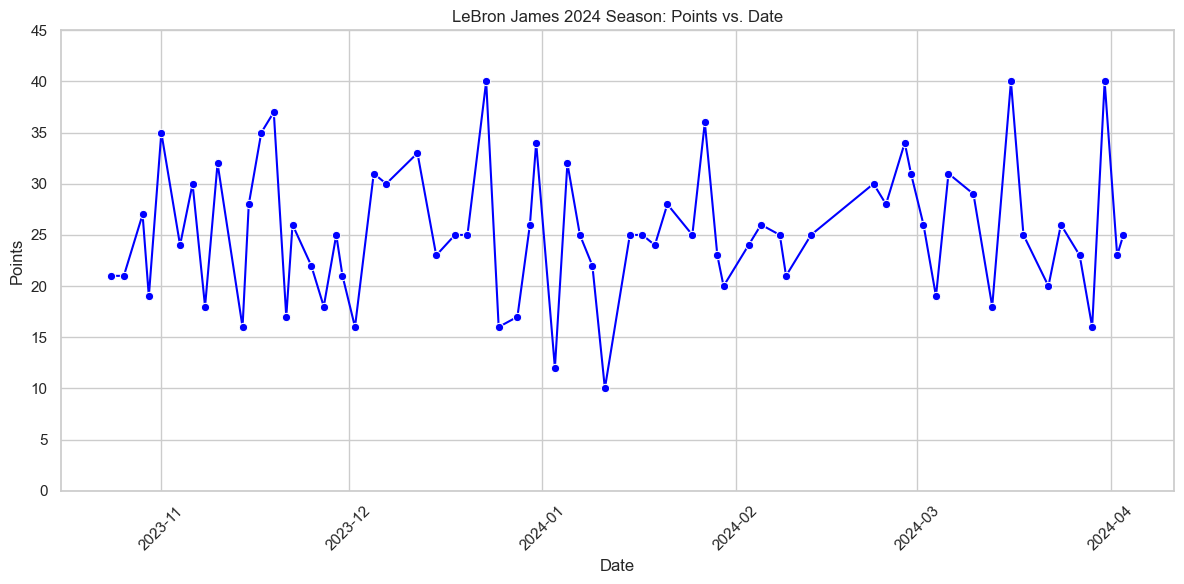

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'PTS' column is not equal to -1
df_filtered = df[df['PTS'] != -1]

# Convert 'Date' column to datetime with a custom format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], format='%Y-%m-%d')

# EDA Graphs
# Plotting Points vs. Date
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='PTS', data=df_filtered, marker='o', color='blue')
plt.title('LeBron James 2024 Season: Points vs. Date')
plt.xlabel('Date')
plt.ylabel('Points')
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0, 45)

plt.tight_layout()
plt.show()


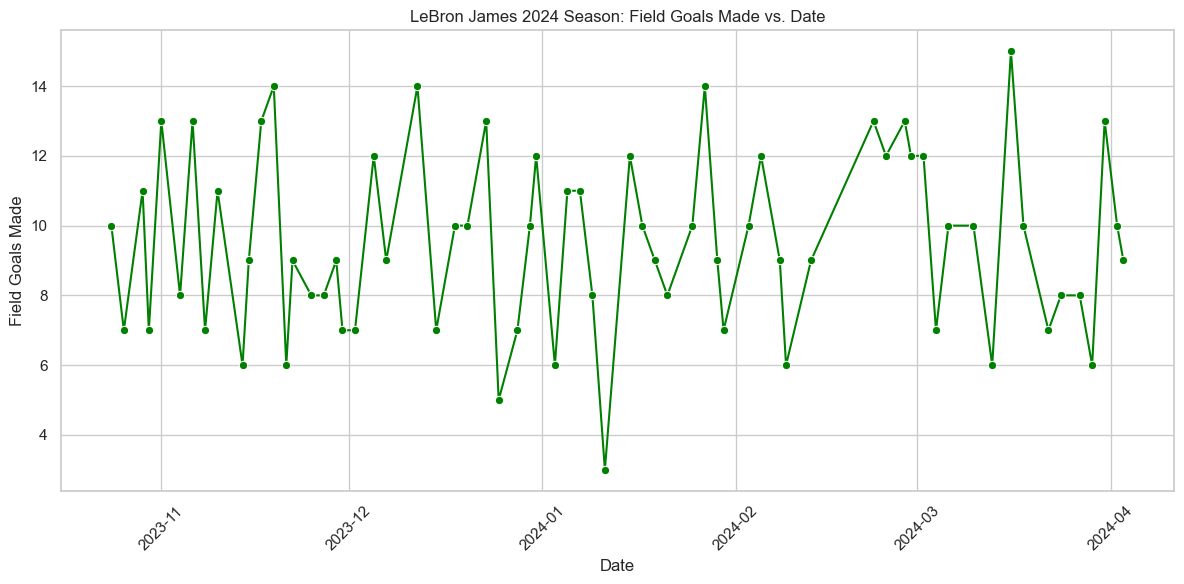

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='FG', data=df_filtered, marker='o', color='green')
plt.title('LeBron James 2024 Season: Field Goals Made vs. Date')
plt.xlabel('Date')
plt.ylabel('Field Goals Made')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


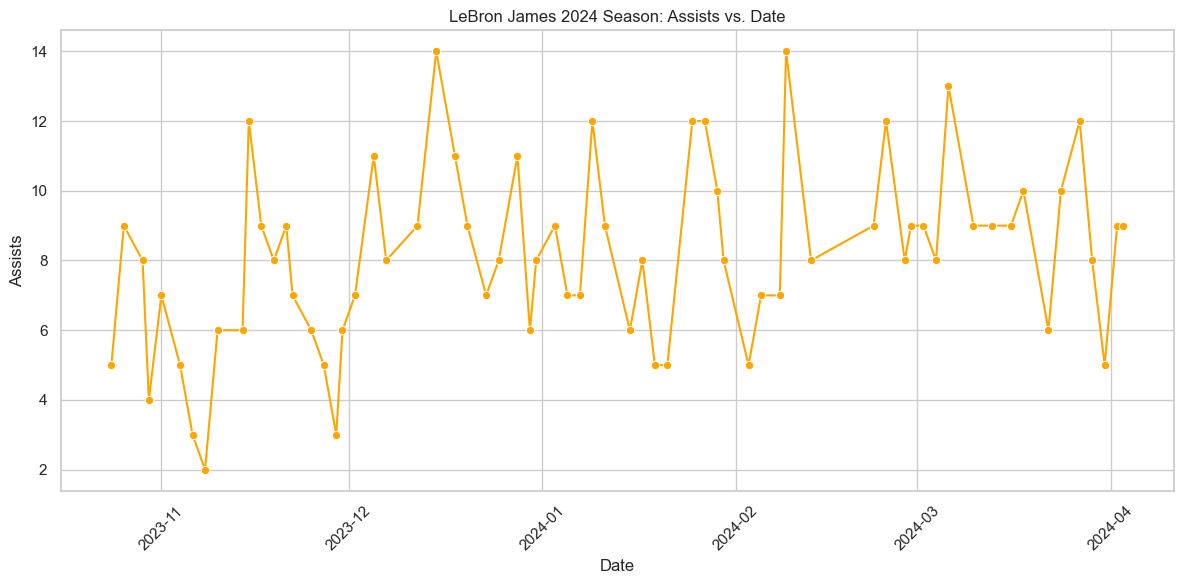

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AST', data=df_filtered, marker='o', color='orange')
plt.title('LeBron James 2024 Season: Assists vs. Date')
plt.xlabel('Date')
plt.ylabel('Assists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


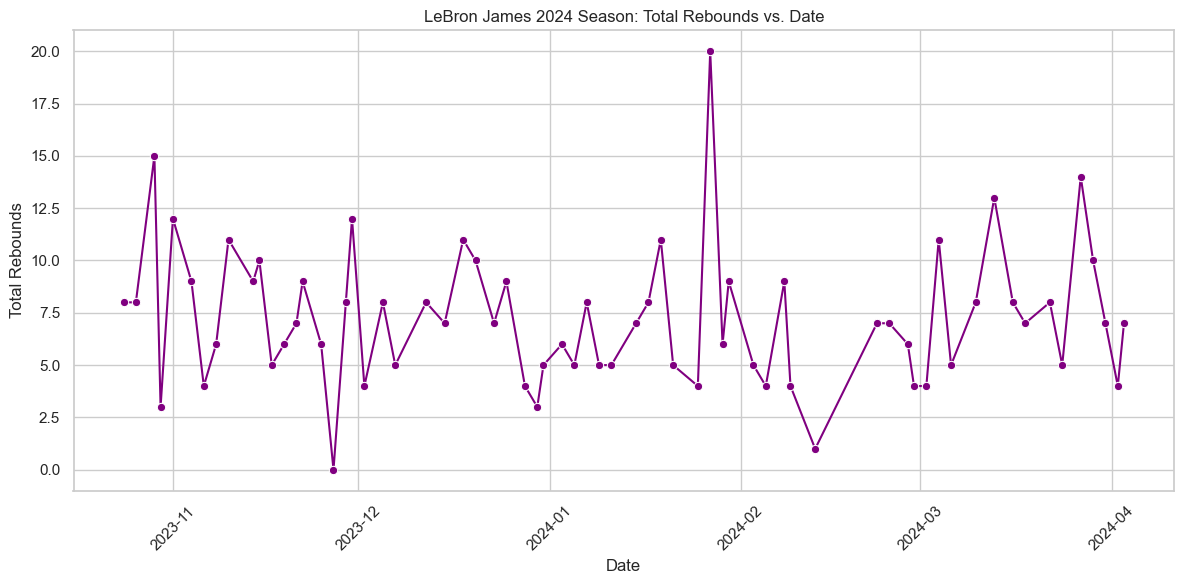

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='TRB', data=df_filtered, marker='o', color='purple')
plt.title('LeBron James 2024 Season: Total Rebounds vs. Date')
plt.xlabel('Date')
plt.ylabel('Total Rebounds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


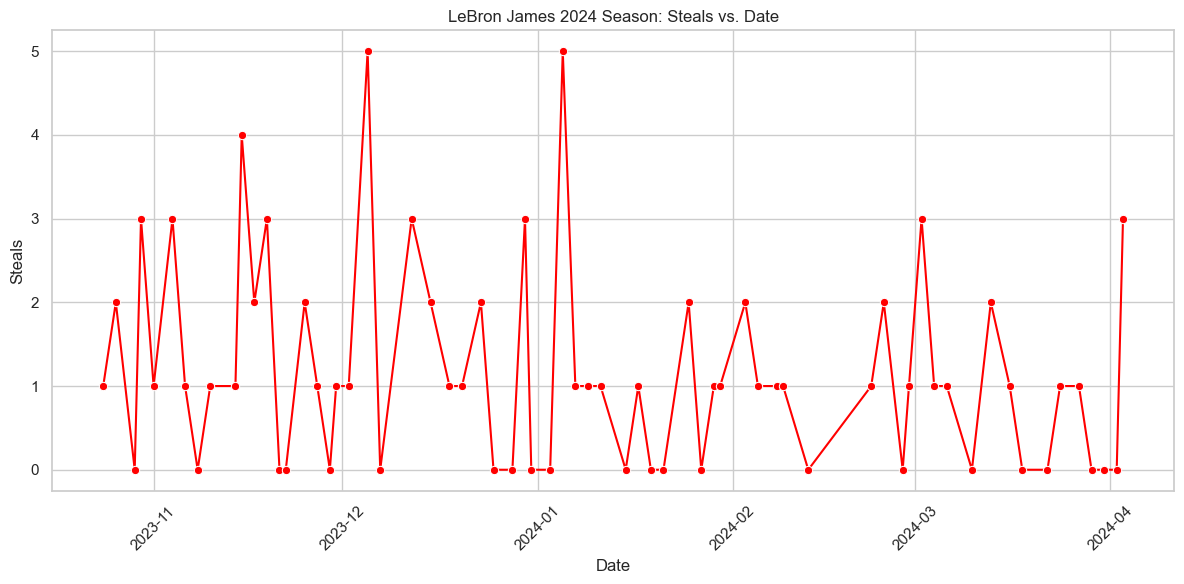

In [73]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='STL', data=df_filtered, marker='o', color='red')
plt.title('LeBron James 2024 Season: Steals vs. Date')
plt.xlabel('Date')
plt.ylabel('Steals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


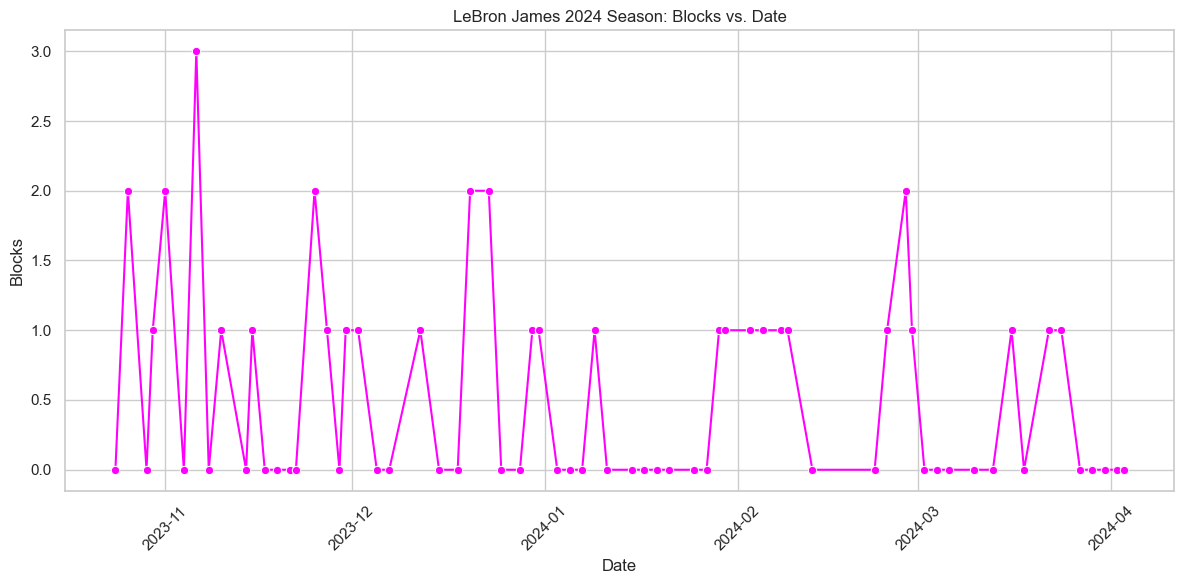

In [74]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='BLK', data=df_filtered, marker='o', color='magenta')
plt.title('LeBron James 2024 Season: Blocks vs. Date')
plt.xlabel('Date')
plt.ylabel('Blocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
